## 변수 선택과 차원 축소

### 주성분 분석의 활용

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')

In [2]:
from sklearn.model_selection import train_test_split
X, y = iris.iloc[:, :-1].values, iris.iloc[:, -1].values
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,
                                        random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X_std = sc.fit_transform(train_X)
test_X_std = sc.transform(test_X)

In [5]:
import numpy as np
cov_mat = np.cov(train_X_std.T)

In [6]:
cov_mat

array([[ 1.00961538, -0.03658858,  0.89282533,  0.84057159],
       [-0.03658858,  1.00961538, -0.3421826 , -0.2898399 ],
       [ 0.89282533, -0.3421826 ,  1.00961538,  0.9779029 ],
       [ 0.84057159, -0.2898399 ,  0.9779029 ,  1.00961538]])

In [11]:
# 고유값 분해를 통해 고유 값, 고유 백터를 구한다
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvvalues: %s' % eigen_vals)

Eigenvvalues: [2.8998938  0.98708902 0.13466453 0.01681419]


In [13]:
tot = sum(eigen_vals)
var_exp = [(i/tot) for i in sorted(eigen_vals, reverse=True)]
var_exp

[0.7180689405527696,
 0.24442204363321537,
 0.033345502524849024,
 0.004163513289165863]

In [14]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.71806894, 0.96249098, 0.99583649, 1.        ])

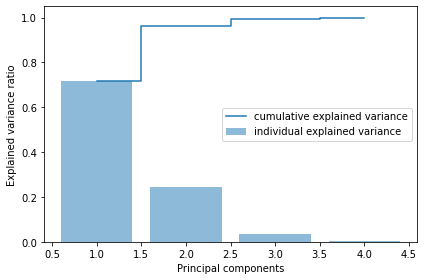

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1, 5), var_exp, alpha=0.5, align='center', label='individual \
explained variance')
plt.step(range(1, 5), cum_var_exp, where='mid', label='cumulative \
explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/pca1.png', dpi=300)
plt.show()

In [18]:
# 주성분과 주성분행렬 쌍을 이용하여 투영행렬 생성
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(2.8998937983861857,
  array([ 0.53547007, -0.20428207,  0.58615942,  0.57267597])),
 (0.9870890223649085,
  array([-3.25785192e-01, -9.44860554e-01,  7.51890810e-04, -3.31960469e-02])),
 (0.13466452942727494,
  array([-0.73207448,  0.23052807,  0.13736953,  0.62614166])),
 (0.016814188283169836,
  array([ 0.26683847, -0.11119432, -0.79846489,  0.52809741]))]

In [20]:
w = np.hstack((eigen_pairs[0][1][:,np.newaxis], 
              eigen_pairs[1][1][:, np.newaxis]))
print('matrix W:\n',w)

matrix W:
 [[ 5.35470073e-01 -3.25785192e-01]
 [-2.04282071e-01 -9.44860554e-01]
 [ 5.86159424e-01  7.51890810e-04]
 [ 5.72675970e-01 -3.31960469e-02]]


In [21]:
train_X_pca = train_X_std.dot(w)

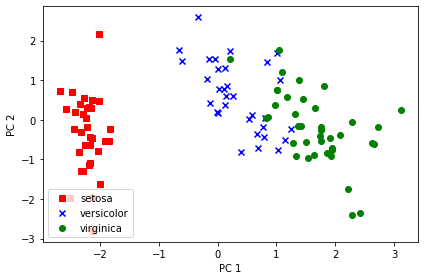

In [22]:
colors = ['r','b', 'g']
markers = ['s','x','o']
for l, c, m in zip(np.unique(train_y), colors, markers):
    plt.scatter(train_X_pca[train_y==l,0], train_X_pca[train_y==l,1],
               c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [23]:
#주성분한 데이터를 이용해 MLPClassifier 모델 생성
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,30))
mlp.fit(train_X_pca, train_y)

C:\Users\san\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50, 30))

In [24]:
print(mlp.score(train_X_pca, train_y))

0.9428571428571428


In [25]:
test_X_pca = test_X_std.dot(w)
pred=mlp.predict(test_X_pca)
pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'virginica', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'virginica', 'setosa', 'setosa'],
      dtype='<U10')

In [26]:
import pandas as pd
confusion_matrix = pd.crosstab(test_y, pred, margins=True,
                              rownames=['True'], colnames=['Pred'])
confusion_matrix

Pred,setosa,versicolor,virginica,All
True,,,,
setosa,16,0,0,16
versicolor,0,15,3,18
virginica,0,0,11,11
All,16,15,14,45


In [27]:
print(mlp.score(test_X_pca, test_y))

0.9333333333333333


### PCA를 이용한 iris데이터 주성분 분석

In [28]:
import seaborn as sns
from sklearn.decomposition import PCA

In [29]:
iris = sns.load_dataset('iris')
iris_X, iris_y = iris.iloc[:,:-1], iris.species

In [31]:
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_X)

In [32]:
iris_pca[:5,:]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [33]:
#주성분의 설명된 분산값
pca.explained_variance_

array([4.22824171, 0.24267075])

In [34]:
#주성분 계수
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

### PCA를 이용해서 얼굴 주성분 분석하기

In [109]:
from imageio import imread
import glob
imgs = []
for image_path in glob.glob('C:\projects\korean_beauty/*.png'):
    image = imread(image_path)
    imgs.append(image)

In [110]:
import numpy as np
N = len(imgs)
images = np.array(imgs)

In [111]:
origin_shape = images.shape

In [112]:
fig_size = (origin_shape[2], origin_shape[1])
fig_size

(30, 35)

In [113]:
images.shape=(N,-1)
images.shape

(20, 3150)

In [114]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
images_std = sc.fit_transform(images)
images_std

array([[-0.36801897, -0.36199969, -0.11670078, ..., -1.05609156,
        -1.12263647, -1.11365179],
       [ 0.76087357,  0.64721157,  0.64715885, ..., -1.47958692,
        -1.37879996, -1.32781559],
       [-0.50348607,  0.03290906,  0.01060916, ...,  0.83640334,
         0.99071228,  0.89413389],
       ...,
       [-1.04535449, -0.5375147 , -0.54106724, ..., -1.43988423,
        -1.43003266, -1.43489749],
       [ 0.48993936,  0.25230282,  0.05304581, ...,  0.54525028,
         0.31187904,  0.07763438],
       [-0.95504308, -0.6252722 , -0.28644736, ..., -1.5589923 ,
        -1.58373075, -1.62229082]])

In [115]:
import numpy as np
cov_mat = np.cov(images_std)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [116]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

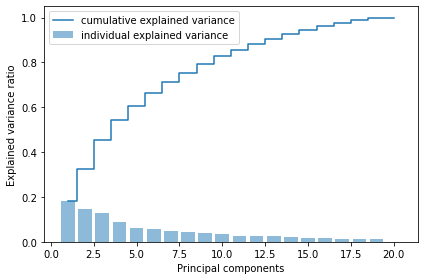

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(range(1, N+1), var_exp, alpha=0.5, align='center',
label='individual explained variance')
plt.step(range(1, N+1), cum_var_exp, where='mid',
label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [118]:
eigen_pairs = [(np.abs(eigen_vals[i]),
eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse=True)

In [121]:
w = eigen_pairs[0][1][:, np.newaxis]
for i in range(1,N):
    w = np.hstack((w,eigen_pairs[i][1][:, np.newaxis]))

In [122]:
print('Matrix W:\n', w)

Matrix W:
 [[ 5.64853002e-02 -2.99156468e-02 -1.70110146e-01 -4.96413333e-01
   2.38247000e-01 -2.59975292e-01 -1.77193492e-01 -7.30748603e-02
   5.24855777e-02 -1.58045629e-01  2.13592998e-01 -1.20053817e-02
  -2.99483654e-02  3.87288450e-02 -5.57135297e-01  8.55409386e-02
   2.34622747e-01  9.26103591e-02  2.28532197e-01 -2.23606798e-01]
 [-4.97213579e-01  2.90809263e-02 -1.43079394e-01  2.69180000e-02
  -2.59154632e-01 -2.00705145e-01  3.53815427e-01  2.78077453e-02
   1.39398361e-01  3.19415793e-01  2.72413236e-01 -3.88121184e-02
  -2.03491590e-01  3.77867025e-01  9.72349700e-02 -8.77519792e-02
   8.33360876e-02  1.29676531e-01  1.58279451e-01 -2.23606798e-01]
 [ 5.62437784e-02  8.19395722e-03  3.87401661e-01  3.57416150e-02
   1.16022790e-02 -2.73690517e-01 -1.88056208e-01  4.40753689e-02
   2.78498576e-01  8.61430216e-02  9.25454653e-02  5.29518509e-01
   3.55801352e-01 -6.81123469e-02  2.65202365e-01 -5.44405142e-02
   7.46532973e-02 -9.06594391e-02  3.01337520e-01 -2.23606798e-

In [123]:
images_pca = images_std.T @ w
images_pca.shape

(3150, 20)

In [124]:
result = images_pca.T
result

array([[-8.01264688e-01, -7.73858452e-02,  1.52357715e-01, ...,
         1.83991670e+00,  1.49072408e+00,  1.21403914e+00],
       [-3.90448663e-01,  1.68946182e-03,  1.24408355e-01, ...,
        -1.55122674e+00, -1.54104896e+00, -1.50162670e+00],
       [-2.12013163e+00, -1.77190355e+00, -1.76680457e+00, ...,
         1.56369372e+00,  1.92321559e+00,  1.98455245e+00],
       ...,
       [ 7.92873346e-01,  9.79861823e-01,  1.00460993e+00, ...,
         7.54510586e-01,  8.42510296e-01,  8.34816723e-01],
       [-3.08065660e-01,  3.46203191e-02, -2.05531581e-02, ...,
         2.10418021e-01,  1.82379584e-01,  1.66521515e-01],
       [-5.91435307e-16, -8.88281831e-17,  3.69421400e-16, ...,
         4.53474303e-16,  2.44120539e-18, -2.25495886e-16]])

In [125]:
result_img = sc.inverse_transform(result)
result_img.shape

(20, 3150)

In [126]:
result_img.shape = origin_shape
result_img.shape

(20, 35, 30, 3)

In [127]:
result_img = result_img.astype(np.uint8)

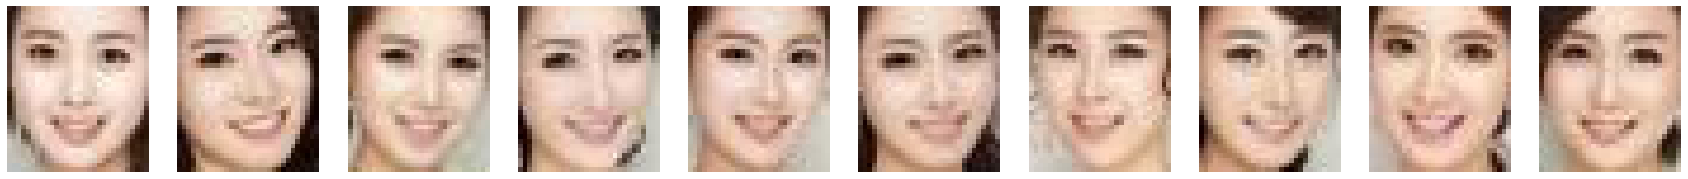

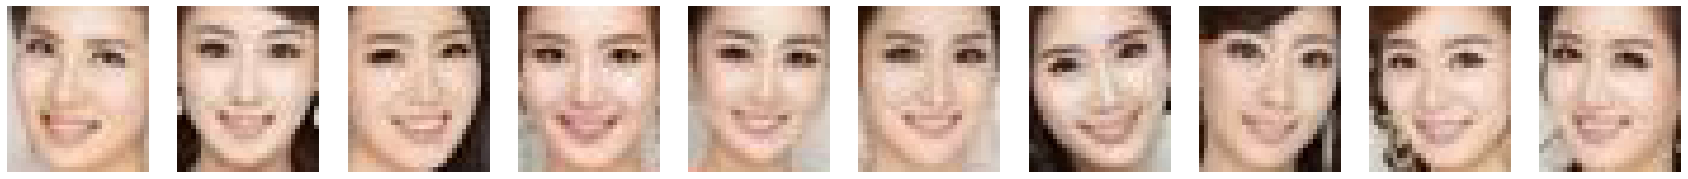

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline
images.shape = origin_shape
nrows = (N//10)
for row in range(nrows):
    plt.figure(figsize=fig_size)
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(images[i + row*10])
        plt.axis("off")
plt.show()

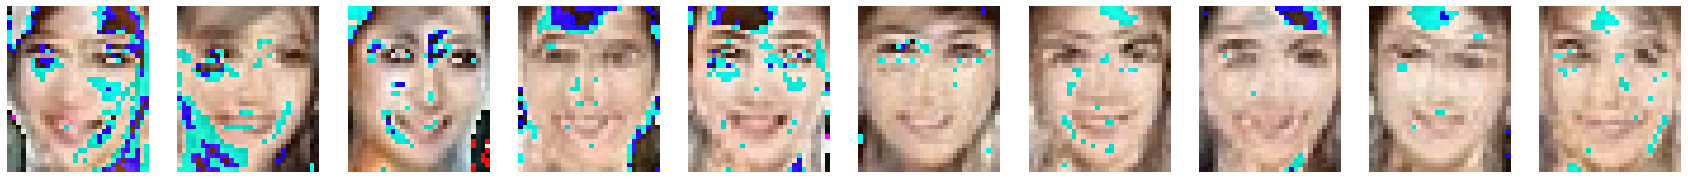

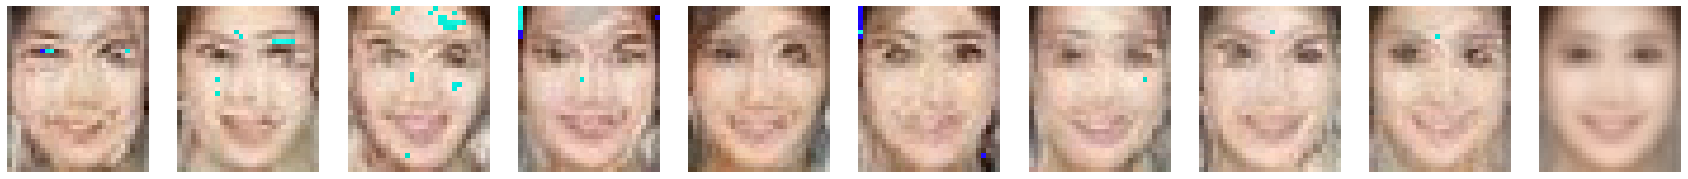

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
nrows = (N//10)
for row in range(nrows):
    plt.figure(figsize=fig_size)
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(result_img[i + row*10])
        plt.axis("off")
plt.show()

### 특이값 분해

In [55]:
x = [32,64,96,118,126,144,152,158]
y = [18,24,61.5,49,52,105,130,125]

In [53]:
A = np.c_[x,[1]*8]
B = np.array(y)

In [57]:
U,s,VT = np.linalg.svd(A, full_matrices =True)
U

array([[-0.09523708, -0.75291219, -0.30570949, -0.28090959, -0.27189145,
        -0.25160063, -0.24258249, -0.23581888],
       [-0.19045071, -0.49902645, -0.10192726,  0.12193311,  0.20333687,
         0.38649535,  0.46789912,  0.52895194],
       [-0.28566433, -0.24514071,  0.91852536, -0.0671799 , -0.06198182,
        -0.05028612, -0.04508804, -0.04118947],
       [-0.3511237 , -0.07059426, -0.09192115,  0.8886239 , -0.11845062,
        -0.13436831, -0.14144283, -0.14674873],
       [-0.37492711, -0.00712283, -0.09571988, -0.12744744,  0.86101527,
        -0.16494364, -0.17648094, -0.18513391],
       [-0.42848478,  0.1356879 , -0.10426703, -0.16360796, -0.18518648,
         0.76626184, -0.25531668, -0.27150057],
       [-0.45228818,  0.19915934, -0.10806576, -0.1796793 , -0.20572059,
        -0.26431349,  0.70964522, -0.30988575],
       [-0.47014074,  0.24676291, -0.1109148 , -0.19173281, -0.22112118,
        -0.287245  , -0.31663336,  0.66132536]])

In [58]:
s

array([336.0759044 ,   0.99321713])

In [59]:
VT

array([[-0.99996895, -0.00788011],
       [ 0.00788011, -0.99996895]])

In [60]:
S = np.zeros((1,1))
S[0][0] = s[0]

In [62]:
A2 = U[:,0:1]@S@VT[0:1,0:1]

In [64]:
A2,A

(array([[ 32.00589279],
        [ 64.00390571],
        [ 96.00191863],
        [118.00055252],
        [126.00005575],
        [143.99893802],
        [151.99844125],
        [157.99806867]]),
 array([[ 32,   1],
        [ 64,   1],
        [ 96,   1],
        [118,   1],
        [126,   1],
        [144,   1],
        [152,   1],
        [158,   1]]))

In [65]:
weight, bias = np.linalg.inv(A.T @ A) @A.T @ B
weight, bias

(0.8744839346616398, -26.72383773110744)

In [68]:
A2 = np.c_[A2,[1]*8]
weight2, bias2 = np.linalg.inv(A2.T@A2) @ A2.T @ B
weight2, bias2

(0.8745382401681373, -26.730728978672136)

In [69]:
import numpy as np
import matplotlib.pyplot as plt

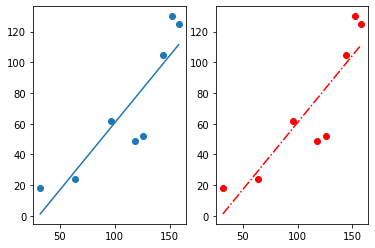

In [70]:
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(x, y)
ax[0].plot(A[:,0], weight*A[:,0] + bias, '-')
ax[1].scatter(A2[:,0], y, color="red")
ax[1].plot(A2[:,0], weight2*A2[:,0] + bias2, '-.', color="red")
plt.show()

##### 특이값 분해의 계산

In [72]:
Uw, Uv = np.linalg.eig(A @ A.T)
Uv

array([[-0.09523708+0.j        ,  0.75291219+0.j        ,
        -0.52722992+0.j        ,  0.10332126-0.02761149j,
         0.10332126+0.02761149j,  0.01670571+0.12039917j,
         0.01670571-0.12039917j, -0.08907633+0.j        ],
       [-0.19045071+0.j        ,  0.49902645+0.j        ,
         0.66667462+0.j        ,  0.10658659-0.06455096j,
         0.10658659+0.06455096j,  0.11622826+0.06446481j,
         0.11622826-0.06446481j,  0.14576631+0.j        ],
       [-0.28566433+0.j        ,  0.24514071+0.j        ,
        -0.11493311+0.j        , -0.14342611+0.03149177j,
        -0.14342611-0.03149177j, -0.26102217-0.40648603j,
        -0.26102217+0.40648603j, -0.10107261+0.j        ],
       [-0.3511237 +0.j        ,  0.07059426+0.j        ,
         0.17507127+0.j        , -0.19859283+0.22684368j,
        -0.19859283-0.22684368j, -0.36853099+0.0525518j ,
        -0.36853099-0.0525518j , -0.2653142 +0.j        ],
       [-0.37492711+0.j        ,  0.00712283+0.j        ,
         0

In [73]:
Vw, Vv = np.linalg.eig(A.T @ A)
Vv

array([[ 0.99996895, -0.00788011],
       [ 0.00788011,  0.99996895]])

In [75]:
s = np.sqrt(Vw)
s

array([336.0759044 ,   0.99321713])

#### 특이값 분해 iris 데이터

In [78]:
import numpy as np
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [79]:
U, s, VT = np.linalg.svd(iris.data)
U

array([[-0.06161685,  0.12961144,  0.0021386 , ..., -0.09343429,
        -0.09573864, -0.08085465],
       [-0.05807094,  0.11101978,  0.07067239, ...,  0.03690405,
        -0.03153954,  0.01309526],
       [-0.05676305,  0.11796647,  0.00434255, ...,  0.03066199,
         0.19531473,  0.13569909],
       ...,
       [-0.0940593 , -0.0498297 , -0.04144001, ...,  0.98181631,
        -0.02194514, -0.00894446],
       [-0.09488961, -0.05610123, -0.21297821, ..., -0.02155617,
         0.94178018, -0.02971961],
       [-0.08847836, -0.0515697 , -0.09575285, ..., -0.0086052 ,
        -0.03021088,  0.9736599 ]])

In [80]:
s

array([95.95991387, 17.76103366,  3.46093093,  1.88482631])

In [81]:
VT

array([[-0.75110816, -0.38008617, -0.51300886, -0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [ 0.50215472, -0.67524332, -0.05916621, -0.53701625],
       [ 0.32081425, -0.31725607, -0.48074507,  0.75187165]])

In [82]:
N=3
S = np.zeros((3,3))
for i in range(N):
    S[i][i] = s[i]

In [83]:
S

array([[95.95991387,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ],
       [ 0.        ,  0.        ,  3.46093093]])

In [84]:
iris2 = U[:,0:3] @ S @ VT[0:3,0:3]
iris_df = pd.DataFrame(data=np.c_[iris2, iris.target],
                      columns=['A','B','C','Species'])
iris_df.head()

,A,B,C,Species
0,5.099009,3.500980,1.401484,0.0
1,4.868704,3.030949,1.446898,0.0
2,4.694221,3.205715,1.308660,0.0
3,4.625181,3.075098,1.462266,0.0
4,5.019480,3.580736,1.370809,0.0


In [89]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(
    iris_df.iloc[:,:-1], iris_df.iloc[:,-1], test_size=0.3)

In [90]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,30), max_iter = 1000)
mlp.fit(train_x, train_y)

MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000)

In [91]:
pred = mlp.predict(test_x)
confusion_matrix = pd.crosstab(test_y, pred,
                              rownames=['True'], colnames=['Pred'],
                              margins=True)
confusion_matrix

Pred,0.0,1.0,2.0,All
True,,,,
0.0,13,0,0,13
1.0,0,17,2,19
2.0,0,0,13,13
All,13,17,15,45


In [92]:
mlp.score(test_x, test_y)

0.9555555555555556

#### 특이값 분해 모듈 사용하기

In [93]:
from sklearn import datasets
from sklearn.utils.extmath import randomized_svd
import numpy as np
import pandas as pd

In [94]:
iris = datasets.load_iris()

In [95]:
U, s, VT = randomized_svd(iris['data'], n_components=3, n_iter=5,
                         random_state=None)

In [96]:
s

array([95.95991387, 17.76103366,  3.46093093])

In [97]:
VT

array([[ 0.75110816,  0.38008617,  0.51300886,  0.16790754],
       [ 0.2841749 ,  0.5467445 , -0.70866455, -0.34367081],
       [-0.50215472,  0.67524332,  0.05916621,  0.53701625]])

In [98]:
S = np.zeros((3,3))
for i in range(3):
    S[i][i] = s[i]

In [99]:
S

array([[95.95991387,  0.        ,  0.        ],
       [ 0.        , 17.76103366,  0.        ],
       [ 0.        ,  0.        ,  3.46093093]])

In [100]:
iris2 = U @ S @ VT[:,0:3]

In [101]:
columns = ['A','B','C','Species']

In [102]:
iris_df = pd.DataFrame(data=np.c_[iris2, iris['target_names'][iris['target']]],
                      columns = columns)

In [103]:
iris_df.head()

,A,B,C,Species
0,5.099009419824256,3.500979593534074,1.40148439953997,setosa
1,4.868703642816383,3.030949245591968,1.4468980697813896,setosa
2,4.694221066713823,3.205714838454974,1.3086598198930006,setosa
3,4.625181192541423,3.075098095037365,1.4622655979398034,setosa
4,5.019479625287912,3.580736425535474,1.3708094836498785,setosa


In [134]:
import numpy as np

In [135]:
A = np.arange(12).reshape(3,4)

In [136]:
type(A[0,0])

numpy.int32

In [139]:
A[:,0].shape

(3,)

In [140]:
A[:,0:1]

array([[0],
       [4],
       [8]])

In [141]:
A[:,0]

array([0, 4, 8])

### 분류모형의 변수 선택

#### 상관관계 확인하기

In [143]:
import pandas as pd
redwine = pd.read_csv('winequality-red.csv', delimiter=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [145]:
X = redwine.iloc[:,:-1]
y = redwine.iloc[:,-1]
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,
                                                   random_state=1)
train_X.shape,test_X.shape, train_y.shape, test_y.shape

((1119, 11), (480, 11), (1119,), (480,))

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

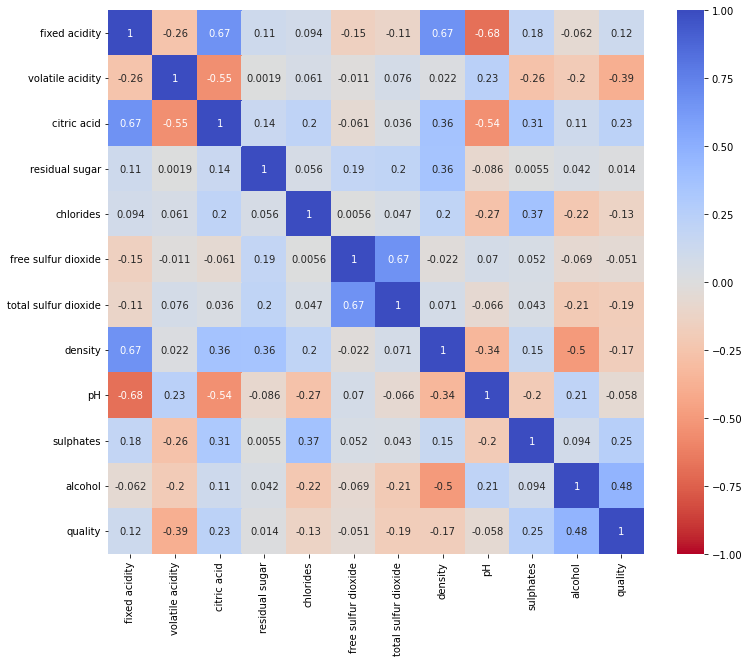

In [148]:
plt.figure(figsize=(12,10))
sns.heatmap(redwine.corr(), annot=True,
           vmin=-1, vmax=1,cmap='coolwarm_r')
plt.show()

#### 분류모형의 Feature importance

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rf_model.fit(train_X,train_y)

RandomForestClassifier(n_estimators=10, random_state=10)

In [151]:
rf_model.feature_importances_

array([0.07679351, 0.10421786, 0.07802557, 0.06573503, 0.07706915,
       0.06138852, 0.10841369, 0.09313385, 0.07038339, 0.10917441,
       0.15566503])

In [152]:
import numpy as np
np.sum(rf_model.feature_importances_)

1.0000000000000002

In [153]:
features = pd.DataFrame(data=np.c_[X.columns, rf_model.feature_importances_],
                       columns=['feature', 'importance'])

In [154]:
features.sort_values(by='importance', ascending=False, inplace=True)
features.reset_index(drop=True, inplace=True)
features

,feature,importance
0,alcohol,0.155665
1,sulphates,0.109174
2,total sulfur dioxide,0.108414
3,volatile acidity,0.104218
4,density,0.093134
5,citric acid,0.078026
6,chlorides,0.077069
7,fixed acidity,0.076794
8,pH,0.070383
9,residual sugar,0.065735


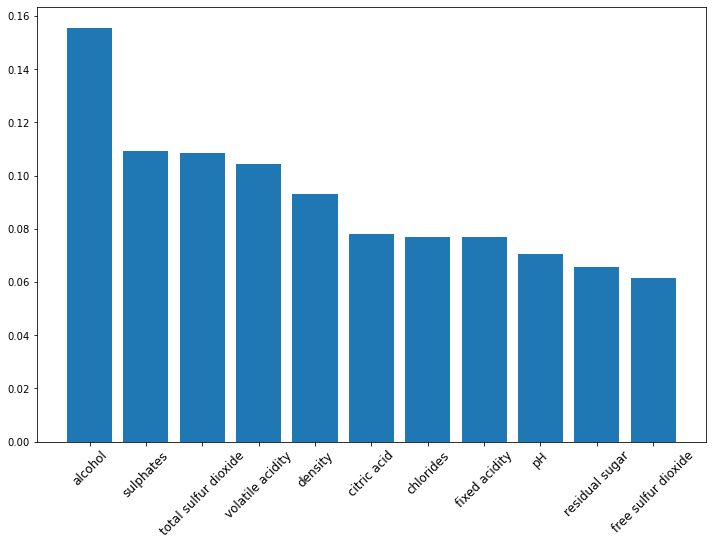

In [155]:
plt.figure(figsize=(12,8))
plt.bar(features.feature, features.importance)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

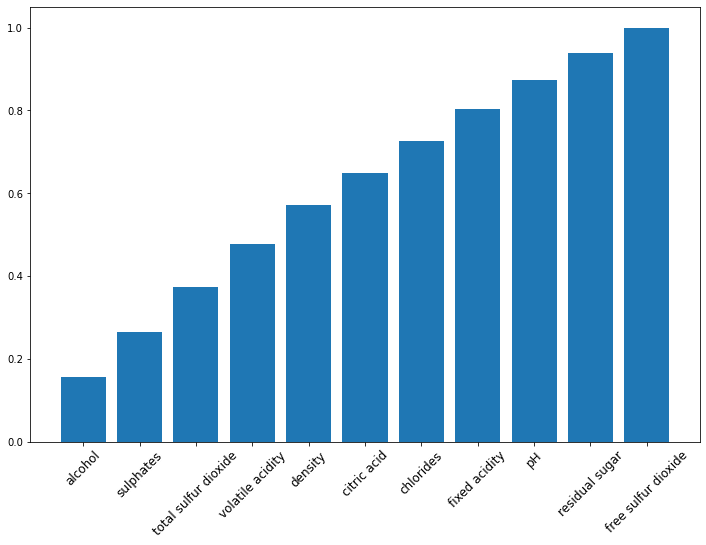

In [156]:
y_stack = np.cumsum(features.importance, axis=0)
plt.figure(figsize=(12,8))
plt.bar(features.feature, y_stack)
plt.xticks(features.feature, fontsize=12, rotation=45)
plt.show()

#### RFE(Recursive Feature Elimination)으로 변수 찾기

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

In [158]:
rf_model = RandomForestClassifier(n_estimators=10, random_state=10)
rfe_model = RFE(rf_model, n_features_to_select =5)
rfe_model.fit(train_X, train_y)

RFE(estimator=RandomForestClassifier(n_estimators=10, random_state=10),
    n_features_to_select=5)

In [159]:
rfe_model.get_support()

array([False,  True, False, False, False, False,  True, False,  True,
        True,  True])

In [160]:
import numpy as np
import pandas as pd
features_rfe = pd.DataFrame(data=np.c_[X.columns.values,
                                      rfe_model.get_support()],
                           columns=['feature', 'selected'])
features_rfe.sort_values(by='selected', ascending=False)

,feature,selected
1,volatile acidity,True
6,total sulfur dioxide,True
8,pH,True
9,sulphates,True
10,alcohol,True
0,fixed acidity,False
2,citric acid,False
3,residual sugar,False
4,chlorides,False
5,free sulfur dioxide,False


In [161]:
features.merge(features_rfe)

,feature,importance,selected
0,alcohol,0.155665,True
1,sulphates,0.109174,True
2,total sulfur dioxide,0.108414,True
3,volatile acidity,0.104218,True
4,density,0.093134,False
5,citric acid,0.078026,False
6,chlorides,0.077069,False
7,fixed acidity,0.076794,False
8,pH,0.070383,True
9,residual sugar,0.065735,False


#### 학습된 모델 저장해놓기 

In [162]:
import pickle
with open('rfe.model', 'wb') as f:
    pickle.dump(rfe_model,f)

In [163]:
with open('rfe.model','rb') as f:
    rfe_model = pickle.load(f)

In [164]:
rfe_model.predict(test_X[:10])

array([5, 6, 8, 6, 6, 6, 6, 5, 5, 6], dtype=int64)

In [165]:
test_y[:10].values

array([5, 6, 6, 6, 6, 6, 6, 5, 5, 5], dtype=int64)

#### 회귀모형의 변수 선택

In [166]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
y = boston.target

In [167]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,
                                                   random_state=1)

In [168]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_X)
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [169]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_X_scaled, train_y)

LinearRegression()

In [174]:
lr.coef_.shape

(13,)

In [173]:
boston.feature_names.shape

(13,)

In [177]:
import pandas as pd
import numpy as np
features = pd.DataFrame(np.c_[boston.feature_names, lr.coef_],
columns = ['feature', 'coef'])

In [178]:
features['coef']=features['coef'].astype(float)

In [179]:
features.sort_values('coef', ascending=False, inplace=True)
features

,feature,coef
5,RM,14.591353
8,RAD,7.073460
1,ZN,6.078411
11,B,2.558014
3,CHAS,2.439560
2,INDUS,1.614200
6,AGE,0.336012
9,TAX,-5.910729
0,CRIM,-7.245609
10,PTRATIO,-9.451384


#### SelectKBest로 변수 선택

In [182]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [184]:
X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape

(150, 1)

In [185]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [186]:
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [187]:
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

(1797, 20)

## 평균값 인코딩의 과적합 해결

### Smoothing

In [190]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
sex_mean = titanic.groupby('sex')['survived'].mean()
titanic['sex_mean'] = titanic['sex'].map(sex_mean)

In [191]:
titanic['sex_n_rows'] = titanic['sex'].map(titanic.groupby('sex').size())
global_mean = titanic['survived'].mean()
alpha=0.7

In [192]:
def smoothing(n_rows, target_mean):
    return (target_mean*n_rows + global_mean*alpha)/ (n_rows + alpha)

In [194]:
titanic['sex_mean_smoothing'] = titanic.apply(
lambda x:smoothing(x['sex_n_rows'], x['sex_mean']),axis=1)

In [195]:
titanic[['sex_mean', 'sex_mean_smoothing']].head()

,sex_mean,sex_mean_smoothing
0,0.188908,0.189144
1,0.742038,0.741241
2,0.742038,0.741241
3,0.742038,0.741241
4,0.188908,0.189144


### CV LOOP

In [196]:
from sklearn.model_selection import train_test_split
import numpy as np

train, test = train_test_split(titanic, test_size=0.2,
                              random_state=42, shuffle=True)

train_new = train.copy()
train_new[:] = np.nan
train_new['sex_mean'] = np.nan
from sklearn.model_selection import StratifiedKFold

In [197]:
train_X = train.drop('survived', axis=1)
train_y = train['survived']
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [198]:
for tr_idx, val_idx in skf.split(train_X, train_y):
    train_X, X_val = train.iloc[tr_idx], train.iloc[val_idx]
    
    means = X_val['sex'].map(train_X.groupby('sex')['survived'].mean())
    X_val['sex_mean'] = means
    train_new.iloc[val_idx] = X_val
    
global_mean = train['survived'].mean()
train_new['sex'] = train_new['sex'].fillna(global_mean)
train_new[['sex','sex_mean']].head()

<ipython-input-198-233c62842b3d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['sex_mean'] = means


,sex,sex_mean
331,male,0.184987
733,male,0.193029
382,male,0.177419
704,male,0.184000
813,female,0.751269


array([[<AxesSubplot:title={'center':'0.0'}>,
        <AxesSubplot:title={'center':'1.0'}>]], dtype=object)

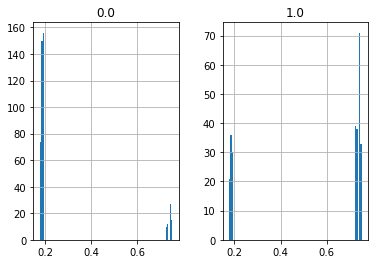

In [199]:
train_new.pivot_table(columns="survived",
index=train_new.index,
values='sex_mean').hist(bins=100)

### Expanding mean

In [201]:
cumsum = train.groupby('sex')['survived'].cumsum() - train['survived']
cumcnt = train.groupby('sex').cumcount() + 1
train_new['sex_mean'] = cumsum/ cumcnt

In [203]:
train_new[['sex', 'sex_mean']].tail()

,sex,sex_mean
106,female,0.733607
270,male,0.187097
860,male,0.186695
435,female,0.734694
102,male,0.186296


array([[<AxesSubplot:title={'center':'0.0'}>,
        <AxesSubplot:title={'center':'1.0'}>]], dtype=object)

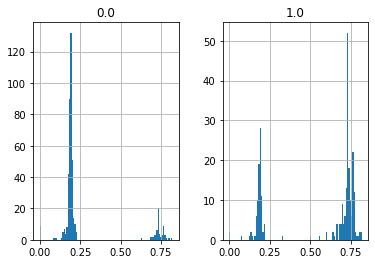

In [205]:
train_new.pivot_table(columns='survived',
                     index=train_new.index,
                     values='sex_mean').hist(bins=100)

## 파라미터 탐색

### validation_curve

In [206]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

TypeError: 'str' object is not callable

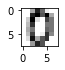

In [218]:
%matplotlib inline
import matplotlib.pyplot as plt
N = 30
nrows=(N//10)

for row in range(nrows):
    plt.figure(figsize=(8,8))
    for i in range(10):
        plt.subplot(1,10,i+1)
        plt.imshow(digits.images[i+row*10], cmap=plt.cm.gray_r,
                  interpolation='nearest')
        plt.axis("off")
    plt.show()

In [220]:
from sklearn.svm import SVC
model = SVC().fit(X,y)
model

SVC()

In [221]:
model.score(X,y)

0.996661101836394

In [222]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [223]:
import numpy as np
param_range = np.logspace(-6,-1,10)

In [224]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
SVC(), X, y, param_name='gamma', param_range=param_range,
cv=10, scoring='accuracy', n_jobs=1)

Wall time: 52 s


In [225]:
import numpy as np
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

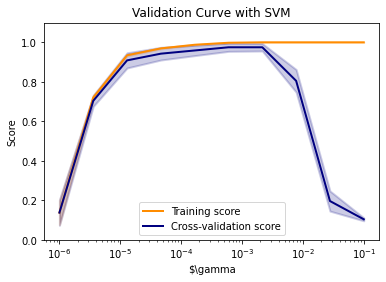

In [226]:
import matplotlib.pyplot as plt

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma')
plt.ylabel('Score')
plt.ylim(0.0,1.1)
lw=2
plt.semilogx(param_range, train_scores_mean, label= 'Training score',
            color='darkorange', lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
train_scores_mean + train_scores_std, alpha=0.2,
color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
test_scores_mean + test_scores_std, alpha=0.2,
color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [227]:
gamma = param_range[test_scores_mean.argmax()]
from sklearn.svm import SVC
model = SVC(gamma=gamma).fit(X, y)
model

SVC(gamma=0.0021544346900318843)

In [228]:
model.score(X, y)

1.0

In [229]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(model, X, y, cv=5))

0.9655137728257506

In [234]:
train_X.shape, train_y.shape

((570, 18), (712,))

### GridSearchCV

In [236]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest

import pandas as pd
redwine = pd.read_csv('winequality-red.csv', sep=';')
redwine_X, redwine_y = redwine.iloc[:,:-1], redwine.iloc[:,-1]

In [238]:
selection = SelectKBest(k=1)
svm = SVC(kernel='linear')
pipeline=Pipeline([('univ_select', selection), ('svm', svm)])
param_grid = dict(univ_select__k=[4,5,6,7,8,9,10,11],
                 svm__C=[0.1,1,10])
grid_search = GridSearchCV(pipeline, param_grid=param_grid,
                          cv=2, verbose=10)
grid_search.fit(redwine_X, redwine_y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2; 1/24] START svm__C=0.1, univ_select__k=4...............................
[CV 1/2; 1/24] END .............svm__C=0.1, univ_select__k=4; total time=   0.0s
[CV 2/2; 1/24] START svm__C=0.1, univ_select__k=4...............................
[CV 2/2; 1/24] END .............svm__C=0.1, univ_select__k=4; total time=   0.0s
[CV 1/2; 2/24] START svm__C=0.1, univ_select__k=5...............................
[CV 1/2; 2/24] END .............svm__C=0.1, univ_select__k=5; total time=   0.0s
[CV 2/2; 2/24] START svm__C=0.1, univ_select__k=5...............................
[CV 2/2; 2/24] END .............svm__C=0.1, univ_select__k=5; total time=   0.0s
[CV 1/2; 3/24] START svm__C=0.1, univ_select__k=6...............................
[CV 1/2; 3/24] END .............svm__C=0.1, univ_select__k=6; total time=   0.2s
[CV 2/2; 3/24] START svm__C=0.1, univ_select__k=6...............................
[CV 2/2; 3/24] END .............svm__C=0.1, univ

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('univ_select', SelectKBest(k=1)),
                                       ('svm', SVC(kernel='linear'))]),
             param_grid={'svm__C': [0.1, 1, 10],
                         'univ_select__k': [4, 5, 6, 7, 8, 9, 10, 11]},
             verbose=10)

In [239]:
print(grid_search.best_estimator_)

Pipeline(steps=[('univ_select', SelectKBest(k=9)),
                ('svm', SVC(C=1, kernel='linear'))])


In [240]:
grid_search.best_params_

{'svm__C': 1, 'univ_select__k': 9}

In [241]:
grid_search.score(redwine_X, redwine_y)

0.5878674171357098

###### PCA, SelectKBest 사용해서 iris데이터 파라미터 탐색

In [242]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [243]:
iris = load_iris()
iris_X, iris_y = iris.data, iris.target

In [244]:
pca = PCA(n_components=2)
selection = SelectKBest(k=1)
combined_features = FeatureUnion([("pca", pca),
("univ_select", selection)])
X_features = combined_features.fit(iris_X, iris_y).transform(iris_X)
svm = SVC(kernel="linear")

In [245]:
pipeline = Pipeline([("features", combined_features), ("svm", svm)])
param_grid = dict(features__pca__n_components=[1, 2, 3],
features__univ_select__k=[1, 2],
svm__C=[0.1, 1, 10])

In [246]:
grid_search = GridSearchCV(pipeline, param_grid=param_grid,
cv=5, verbose=10)
grid_search.fit(iris_X, iris_y)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 1/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1; total time=   0.0s
[CV 2/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 2/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1; total time=   0.0s
[CV 3/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 3/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1; total time=   0.0s
[CV 4/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 4/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1; total time=   0.0s
[CV 5/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 5/5; 1/18] END features__pca__n_components=1

[CV 4/5; 16/18] END features__pca__n_components=3, features__univ_select__k=2, svm__C=0.1; total time=   0.0s
[CV 5/5; 16/18] START features__pca__n_components=3, features__univ_select__k=2, svm__C=0.1
[CV 5/5; 16/18] END features__pca__n_components=3, features__univ_select__k=2, svm__C=0.1; total time=   0.0s
[CV 1/5; 17/18] START features__pca__n_components=3, features__univ_select__k=2, svm__C=1
[CV 1/5; 17/18] END features__pca__n_components=3, features__univ_select__k=2, svm__C=1; total time=   0.0s
[CV 2/5; 17/18] START features__pca__n_components=3, features__univ_select__k=2, svm__C=1
[CV 2/5; 17/18] END features__pca__n_components=3, features__univ_select__k=2, svm__C=1; total time=   0.0s
[CV 3/5; 17/18] START features__pca__n_components=3, features__univ_select__k=2, svm__C=1
[CV 3/5; 17/18] END features__pca__n_components=3, features__univ_select__k=2, svm__C=1; total time=   0.0s
[CV 4/5; 17/18] START features__pca__n_components=3, features__univ_select__k=2, svm__C=1
[CV 

In [247]:
grid_search.score(iris_X, iris_y)

0.9733333333333334

In [248]:
pred = grid_search.predict(iris_X)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [249]:
import pandas as pd
pd.crosstab(iris_y, pred,
rownames=['True'], colnames=['Pred'],
margins=True)

Pred,0,1,2,All
True,,,,
0,50,0,0,50
1,0,46,4,50
2,0,0,50,50
All,50,46,54,150


### ParameterGrid

In [250]:
from sklearn.model_selection import ParameterGrid
param_grid = {'a': [1, 2], 'b': [True, False]}
list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [253]:
param_grid = [{'kernel': ['linear']},
{'kernel': ['rbf'], 'gamma': [1, 10]}]
list(ParameterGrid(param_grid))

[{'kernel': 'linear'},
 {'gamma': 1, 'kernel': 'rbf'},
 {'gamma': 10, 'kernel': 'rbf'}]

In [254]:
ParameterGrid(grid)[1]

TypeError: Parameter grid is not a dict or a list (GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'subsample': [0.4, 0.6, 0.8, 1.0]}))

### Pipeline과 GridSearchCV를 이용한 차원감소

In [255]:
%%time
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2
pipe = Pipeline([
# the reduce_dim stage is populated by the param_grid
('reduce_dim', None),
('classify', LinearSVC())
])
N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
{
'reduce_dim': [PCA(iterated_power=7), NMF()],
'reduce_dim__n_components': N_FEATURES_OPTIONS,
'classify__C': C_OPTIONS
},
{
'reduce_dim': [SelectKBest(chi2)],
'reduce_dim__k': N_FEATURES_OPTIONS,
'classify__C': C_OPTIONS
},
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']
grid = GridSearchCV(pipe, cv=5, n_jobs=-1, param_grid=param_grid)
digits = load_digits()
grid.fit(digits.data, digits.target)

Wall time: 29.3 s


C:\Users\san\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('reduce_dim', None),
                                       ('classify', LinearSVC())]),
             n_jobs=-1,
             param_grid=[{'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [PCA(iterated_power=7, n_components=8),
                                         NMF()],
                          'reduce_dim__n_components': [2, 4, 8]},
                         {'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [SelectKBest(score_func=<function chi2 at 0x00000212842BA940>)],
                          'reduce_dim__k': [2, 4, 8]}])

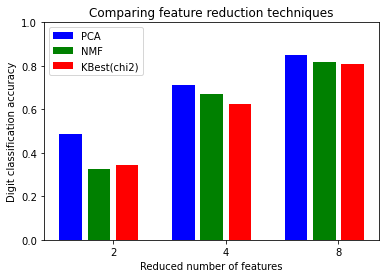

In [258]:
%matplotlib inline
import matplotlib.pyplot as plt
mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1,
len(N_FEATURES_OPTIONS))
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
(len(reducer_labels) + 1) + .5)
plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])
    plt.title("Comparing feature reduction techniques")
    plt.xlabel('Reduced number of features')
    plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
    plt.ylabel('Digit classification accuracy')
    plt.ylim((0, 1))
    plt.legend(loc='upper left')
plt.show()

## 자료 불균형 처리

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=10, n_informative=5,
n_redundant=0, n_clusters_per_class=1,
n_classes=2, weights=[0.99, 0.01],
random_state=42)

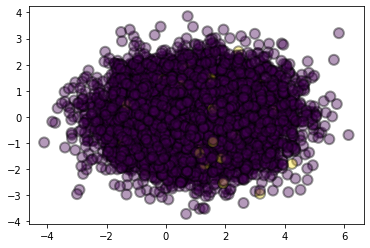

In [4]:
plt.scatter(x=X[:,0], y=X[:,1], marker='o', c=y,
s=100, edgecolor="k", linewidth=2, alpha=0.4)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size=0.3,
                                                   random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2,
                                 random_state=42)
rf_model.fit(train_X, train_y)

RandomForestClassifier(max_features=2, random_state=42)

In [7]:
rfc_pred = rf_model.predict(test_X)

In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, rfc_pred)

array([[2960,    0],
       [  36,    4]], dtype=int64)

In [9]:
from sklearn.metrics import classification_report
print(classification_report(test_y, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2960
           1       1.00      0.10      0.18        40

    accuracy                           0.99      3000
   macro avg       0.99      0.55      0.59      3000
weighted avg       0.99      0.99      0.98      3000



### Smote

In [10]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X, y)

In [12]:
X_resampled.shape, y_resampled.shape

((19720, 10), (19720,))

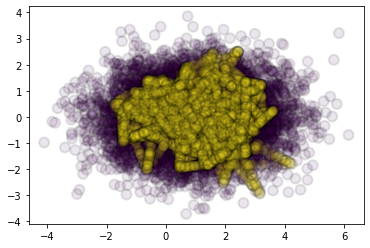

In [14]:
plt.scatter(x=X_resampled[:,0], y=X_resampled[:,1],
           marker='o', c=y_resampled,
           s=100, edgecolor='k', linewidth=2, alpha=0.1)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
    train_X, test_X, train_y, test_y = train_test_split(X_resampled,
y_resampled, test_size=0.3, shuffle=True, random_state=42)
    train_X.shape, test_X.shape, train_y.shape, test_y.shape

((13804, 10), (5916, 10), (13804,), (5916,))

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2,
random_state=42)
rf_model.fit(train_X, train_y)

RandomForestClassifier(max_features=2, random_state=42)

In [17]:
pred = rf_model.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

array([[2963,    5],
       [  39, 2909]], dtype=int64)

In [18]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2968
           1       1.00      0.99      0.99      2948

    accuracy                           0.99      5916
   macro avg       0.99      0.99      0.99      5916
weighted avg       0.99      0.99      0.99      5916



###### 계층적으로 샘플링하기

In [19]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=10, n_informative=5,
n_redundant=0, n_clusters_per_class=1,
n_classes=2, weights=[0.99, 0.01],
random_state=42)

In [20]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,
stratify=y, random_state=42)

In [21]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
resampled_X.shape, resampled_y.shape

((13804, 10), (13804,))

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2,
random_state=42)
rf_model.fit(resampled_X, resampled_y)

RandomForestClassifier(max_features=2, random_state=42)

In [23]:
pred = rf_model.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

array([[2956,    2],
       [  27,   15]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2958
           1       0.88      0.36      0.51        42

    accuracy                           0.99      3000
   macro avg       0.94      0.68      0.75      3000
weighted avg       0.99      0.99      0.99      3000



### 가중치 제어

In [25]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=10000, n_features=10, n_informative=5,
n_redundant=0, n_clusters_per_class=1,
n_classes=2, weights=[0.99, 0.01],
random_state=42)

In [26]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,
stratify=y, random_state=42)

In [27]:
# model생성 시 class에 가중치 값을 딕셔너리형태로 전달
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2,
                            class_weight={0:1, 1:1.4},random_state=42)
rf_model.fit(train_X, train_y)

RandomForestClassifier(class_weight={0: 1, 1: 1.4}, max_features=2,
                       random_state=42)

In [28]:
rfc_pred = rf_model.predict(test_X)
from sklearn.metrics import classification_report
print(classification_report(test_y, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.21      0.35        42

    accuracy                           0.99      3000
   macro avg       0.99      0.61      0.67      3000
weighted avg       0.99      0.99      0.99      3000

